In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling as pp
from sklearn import preprocessing

In [88]:
train=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\train.csv')

In [89]:
df2=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\fulfilment_center_info.csv')

In [90]:
df3=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\meal_info.csv')

In [91]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [92]:
df2.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [93]:
df3.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [94]:
df3.shape

(51, 3)

In [95]:
train.shape

(456548, 9)

In [96]:
df2.shape

(77, 5)

In [97]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [98]:
df2.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [99]:
df3.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [102]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [103]:
test=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\test_QoiMO9B.csv')

In [104]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [105]:

train = pd.merge(train,df2, on='center_id')
test = pd.merge(test,df2, on='center_id')

train = pd.merge(train,df3, on='meal_id')
test = pd.merge(test,df3, on='meal_id')

In [106]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [107]:



test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


In [109]:
train.shape

(456548, 15)

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
city_code                32573 non-null int64
region_code              32573 non-null int64
center_type              32573 non-null object
op_area                  32573 non-null float64
category                 32573 non-null object
cuisine                  32573 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ MB


In [111]:
test.shape

(32573, 14)

In [112]:
train.num_orders.describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [113]:

#train = train.drop(['center_id', 'meal_id'], axis=1)
#train.head()

In [114]:
#cols = train.columns.tolist()
#print(cols)

In [115]:
#cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
#print(cols)

In [116]:
#train = train[cols]
#train.dtypes

In [117]:
c=train.corr()

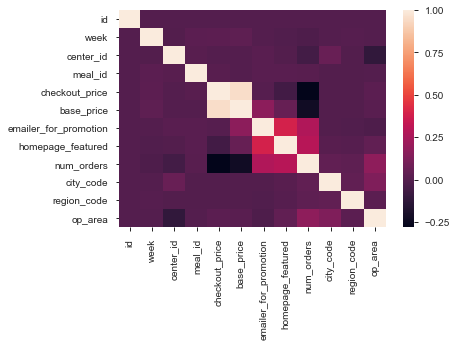

In [118]:
sns.heatmap(c)

C:\Users\ananyya srivastava\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


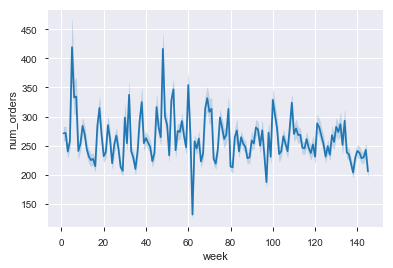

In [119]:
sns.lineplot(train['week'],train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

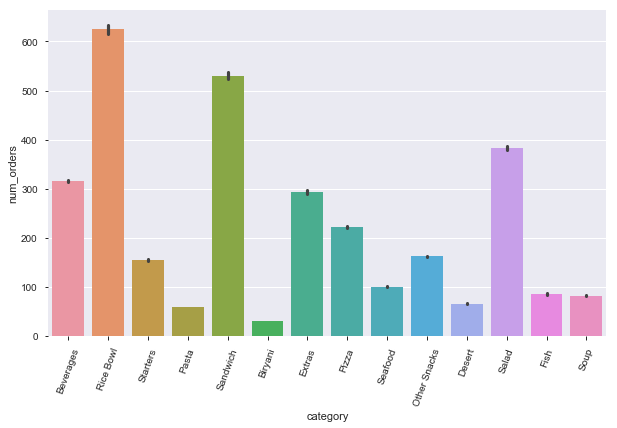

In [120]:
plt.figure(figsize = (10,6))
sns.barplot(x='category', y = 'num_orders', data = train)
plt.xticks(rotation = '70')

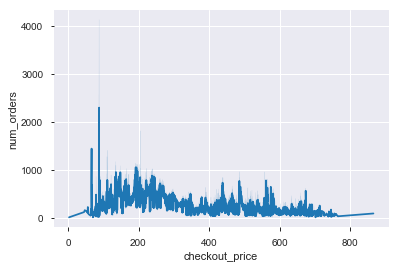

In [121]:
sns.lineplot(train['checkout_price'],train['num_orders'])

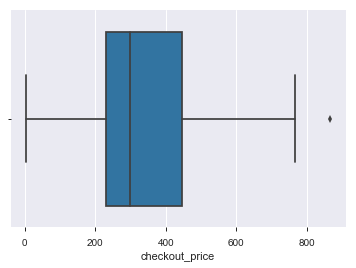

In [122]:
sns.boxplot(x=train.checkout_price,data=train)

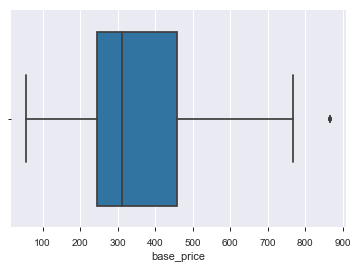

In [123]:
sns.boxplot(x=train.base_price,data=train)

In [124]:
train['category'].value_counts(sort=True)

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64

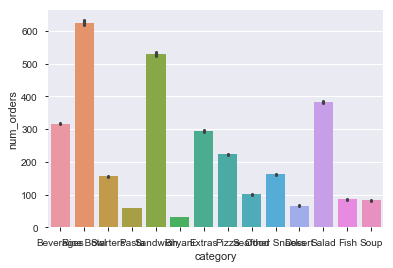

In [125]:
sns.barplot(x=train.category,y=train.num_orders,data=train)

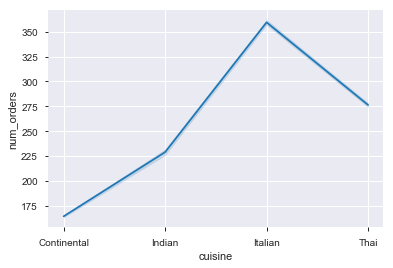

In [126]:
sns.lineplot(x=train.cuisine,
             y=train.num_orders ,data=train)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

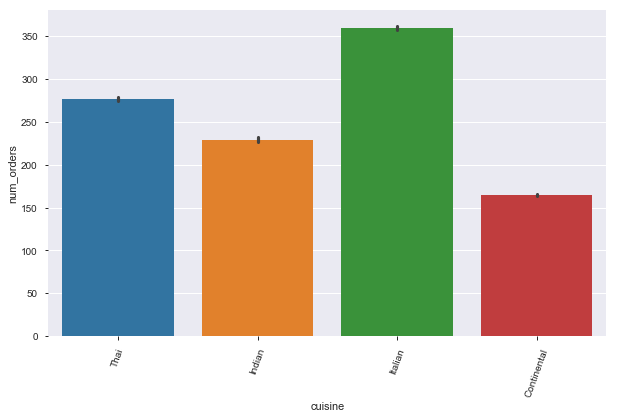

In [127]:
plt.figure(figsize = (10,6))
sns.barplot(x='cuisine', y = 'num_orders', data = train)
plt.xticks(rotation = '70')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

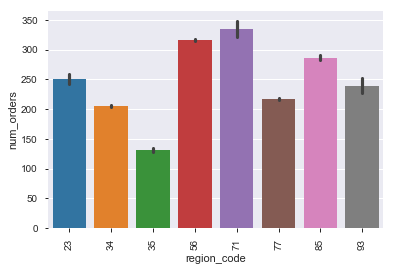

In [128]:
sns.barplot(train['region_code'],train['num_orders'])
plt.xticks(rotation = '90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

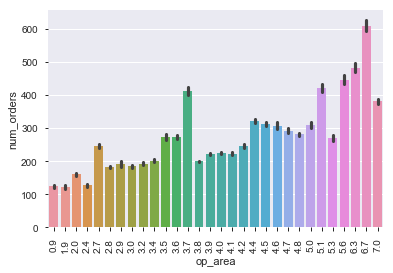

In [129]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = '90')

(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 <a list of 8 Text xticklabel objects>)

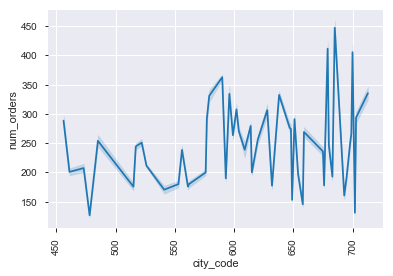

In [130]:
sns.lineplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = '90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

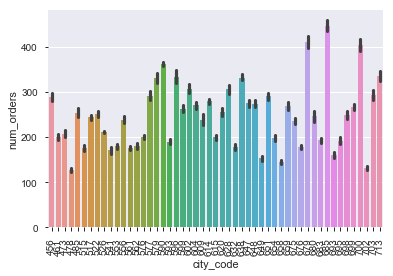

In [131]:
sns.barplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = '90')

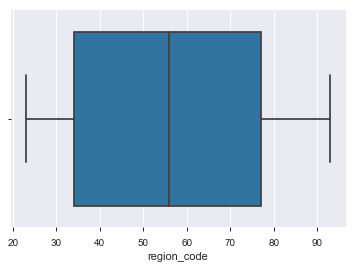

In [132]:
sns.boxplot(x='region_code',data=train)

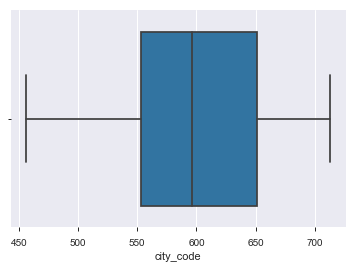

In [133]:
sns.boxplot(x='city_code',data=train)

In [134]:
train['city_code'].nunique()

51

In [135]:
train['region_code'].nunique()

8

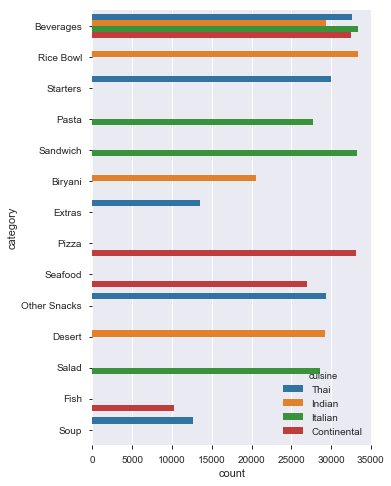

In [136]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'])
plt.show()

In [137]:
categorical_columns = ['week', 'emailer_for_promotion', 'homepage_featured', 'city_code', 
                       'region_code', 'center_type', 'category', 'cuisine']
for column in categorical_columns:
    train[column] = train[column].astype('category')


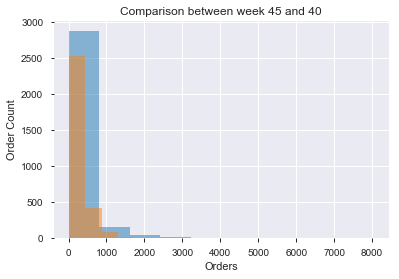

In [138]:
dataset_week_45 = train[train.week == 45]
dataset_week_40 = train[train.week == 40]

dataset_week_45.num_orders.hist(alpha=0.5)
dataset_week_40.num_orders.hist(alpha=0.5)
_ = plt.xlabel('Orders')
_ = plt.ylabel('Order Count')
_ = plt.title('Comparison between week 45 and 40')
plt.show()

In [139]:
dataset_week_45.emailer_for_promotion.value_counts()

0    2770
1     332
Name: emailer_for_promotion, dtype: int64

In [140]:
dataset_week_40.emailer_for_promotion.value_counts()

0    2847
1     223
Name: emailer_for_promotion, dtype: int64

In [141]:
train[train.week == 13].emailer_for_promotion.value_counts()

0    2610
1     228
Name: emailer_for_promotion, dtype: int64

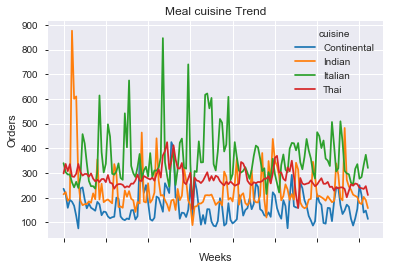

In [142]:
cuisine_trend = train.pivot_table(index='week', columns='cuisine', values='num_orders', aggfunc='mean')

cuisine_trend.plot()
_ = plt.title("Meal cuisine Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")

plt.show()

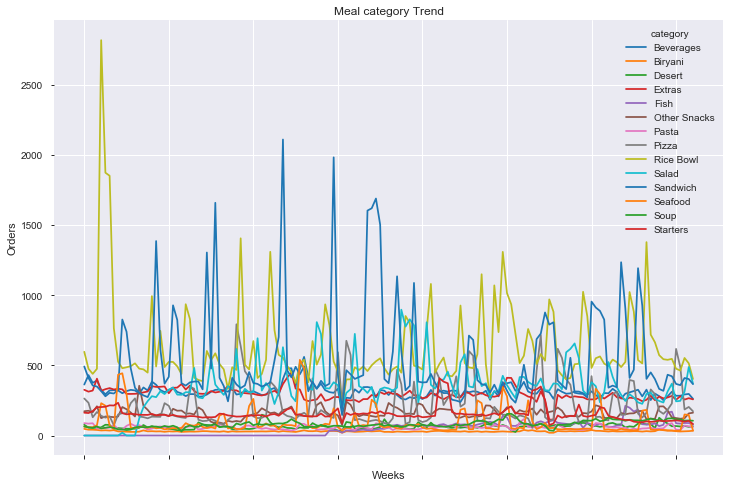

In [143]:
category_trend = train.pivot_table(index='week', columns='category', values='num_orders', aggfunc='mean')
category_trend = category_trend.fillna(0)

category_trend.plot(figsize=(12, 8))
_ = plt.title("Meal category Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")


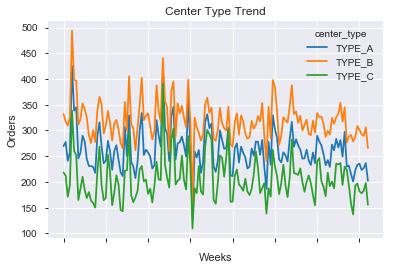

In [144]:
center_type_trend = train.pivot_table(index='week', columns='center_type', values='num_orders', 
                                        aggfunc='mean')

center_type_trend.plot()
_ = plt.title("Center Type Trend")
_ = plt.xlabel("Weeks")
_ = plt.ylabel("Orders")

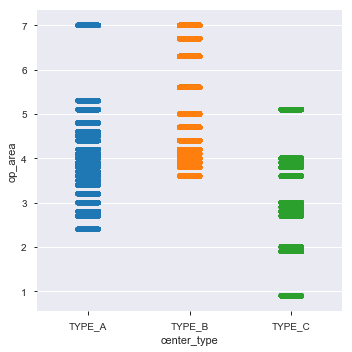

In [145]:
sns.catplot(x = 'center_type', y = 'op_area', data=train)
plt.show()


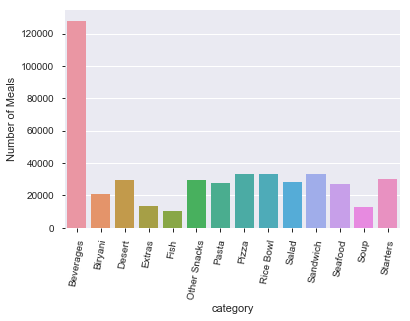

In [146]:
ax = sns.countplot(train['category'])
ax.set(ylabel= "Number of Meals")
plt.xticks(rotation=80)
plt.show()

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
lb1 = LabelEncoder()
train['center_type'] = lb1.fit_transform(train['center_type'])

lb2 = LabelEncoder()
train['category'] = lb1.fit_transform(train['category'])

lb3 = LabelEncoder()
train['cuisine'] = lb1.fit_transform(train['cuisine'])


In [149]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [150]:
from sklearn.ensemble import RandomForestRegressor
mm=RandomForestRegressor(n_jobs=-1,n_estimators=200,oob_score=True)

In [151]:
y=train['num_orders']

In [152]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2,2.0,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2,2.0,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2,2.0,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2,2.0,0,3


In [153]:
y=train['num_orders']
x=train.drop(['num_orders'],axis=1)


In [154]:
mm.fit(x.values,np.array(y))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [155]:
X_test=test

In [158]:
y_preds=mm.predict(X_test.values)
np.sum(y_preds<0)

0

In [157]:
lba = LabelEncoder()
test['center_type'] = lb1.fit_transform(test['center_type'])

lbb = LabelEncoder()
test['category'] = lb1.fit_transform(test['category'])

lbc = LabelEncoder()
test['cuisine'] = lb1.fit_transform(test['cuisine'])

In [159]:
submission=pd.read_csv(r'C:\Users\ananyya srivastava\Downloads\sub.csv')
submission.head()


,id,num_orders
0,1028232,0
1,1127204,0
2,1212707,0
3,1082698,0
4,1400926,0


In [160]:
submission['id']=X_test.id
submission['num_orders']=y_preds


In [161]:
pd.DataFrame(submission, columns=['id','num_orders']).to_csv('RandomForests.csv',index=False)